# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**ISRAEL EZEMA**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd                                     # for loading CSV data
import numpy as np                                      # Used for mathematical operations
import matplotlib.pyplot as plt                         # for Graphical Representation
import seaborn as sns                                   # for specialized plots

# Libraries for data preparation
from statsmodels.graphics.correlation import plot_corr  # To plot correlation heatmap
from sklearn.impute import KNNImputer                   # for Imputing missing values using k-Nearest Neighbors
from sklearn.preprocessing import StandardScaler        # For standardizing features

# Libraries for Model Building
from sklearn.model_selection import train_test_split    # To split the data into training and testing data
from sklearn.linear_model import LinearRegression       # For the LINEAR Model from Sklearn
from sklearn.linear_model import Ridge                  # For the RIDGE Regression module from sklearn
from sklearn.linear_model import Lasso                  # For the LASSO Model from Sklearn
from sklearn.model_selection import GridSearchCV        # To sort out our Hyper_Parameters
import xgboost as xgb                                   # For the xgBoost Model

# Libraries for calculating performance metrics
from sklearn import metrics                             # for checking performance
from sklearn.metrics import r2_score                    # for checking R-squared Error

# Libraries to Save/Restore Models
import pickle

# Setting global constants to ensure notebook results are reproducible
test_size=0.2, 
shuffle=False, 
random_state=123                                                                           
                                                    

C:\Users\USER\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv', index_col=0)

We will be using functions of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, `rainfall` etc. from our train dataset to train our model.

**Note** the feature we will be predicting is `load_shortfall_3h`, i.e. the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# View dataset
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
# View Column Names for possible White Spaces
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

**Observation:** 
* Data of 49 columns observed i.e including our target variable
* We will have to DROP the first column (“Unnamed”) 

Because it's not a valid feature. it is caused when our data was converted to CSV using `to_csv()`, saving the index column along with the file as an "Unnamed: 0". This should be avoided when reconverting back to pandas dataframe as it's values could heavily distort the performance of our Model
* Column Names have no White Spaces. Which is OKAY

In [5]:
# Drop Unnamed Column
df_train = df_train.drop('Unnamed: 0', axis=1)

In [6]:
# Confirm Dropped Column
df_train.head().T

,0,1,2,3,4
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333
Seville_clouds_all,0.0,0.0,0.0,0.0,0.0


**Observation:** 

- Dropped Column Confirmed. Okay
- High proportion of ZERO VALUE observed within some of our features; chances of skewing our data
    
    `Resolution:` These are valid imputations as they are observed within columns such as RAINFALL, SNOW, CLOUD and its very possible to record zero rain, snow or clouds. So we leave data as it is.
- Visually observing possible CATEGORICAL dataset.(SEE "Summary of dataset" below for Confirmation).
    
    N/B: Categorical variables really require special attention in regression analysis because, unlike numerical variables, they cannot by entered into the regression equation just as they are. Instead, they need to be recoded into numerical representation which can then be entered into the regression model.

**NEXT:** 

Lets see the Shape and Summary of our Dataset to gain further Insight about the Variables in our Dataset

In [7]:
#check the shape of the dateset
print('Train dataset : ', df_train.shape)
print('Test dataset : ', df_test.shape)

Train dataset :  (8763, 48)
Test dataset :  (2920, 47)


Our Shape looks good;

- The TRAIN dataset; has 8763 rows and 48 columns
- The TEST dataset; has 2920 rows and 47 columns excluding our dependent variable "load_shortfall_3h"

In [8]:
# summary of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

**Observation:** 

1. Identified 3(three) of our Potential features having datatype OBJECT (CATEGORICAL)

       a. Valencia_wind_deg --> Covert to Numerical 
       b. Seville_pressure  --> Covert to Numerical 
       c. time              --> Covert to DateTime
       
2. Valencia_pressure  has   6695 non-null   Instead of 8763 (TOTAL MISSING VALUE = **2068**). See below for Confirmation

No. of missing values in Valencia_pressure: 2068


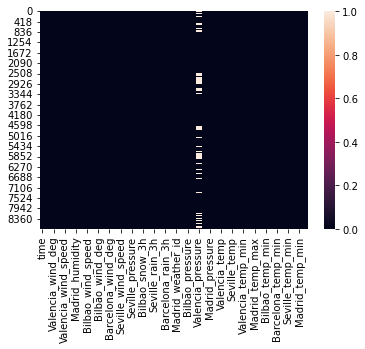

In [9]:
# Confirming & Visualizing our missing values
sns.heatmap(df_train.isnull())
print('No. of missing values in Valencia_pressure: ' + str(df_train['Valencia_pressure'].isnull().sum()))

The above heatmap shows how the spread of missing value in the Valencia_pressure Column
- The white region representing the missing values, between 0 to 8360 observation points
- The Dark region represening Actual values.


**NEXT:** 

We perform some indepth descriptive analysis

In [10]:
# look at data statistics
df_train.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


N/B: This covers only numerical variables

**Observation:** 

- Based on the MEANS and STANDARD DEVIATIONS of the different columns, we observed a high RANGE variation between our possible predictive features. we definately will have to consider STANDARDIZING our data. It also decreases the effect of the outliers, due to the scaling the magnitude differences, making our model become more robust

In [11]:
# look at data statistics of categorical data
df_train.describe(include=['object'])

,time,Valencia_wind_deg,Seville_pressure
count,8763,8763,8763
unique,8763,10,25
top,2015-01-01 03:00:00,level_1,sp13
freq,1,1072,500


Valencia_wind_deg are Categorized between 
   * Level_1 to Level_10   
   
Seville_pressure are Categorized between
   * sp1  to  sp25

We will have to Dummy Encode this.

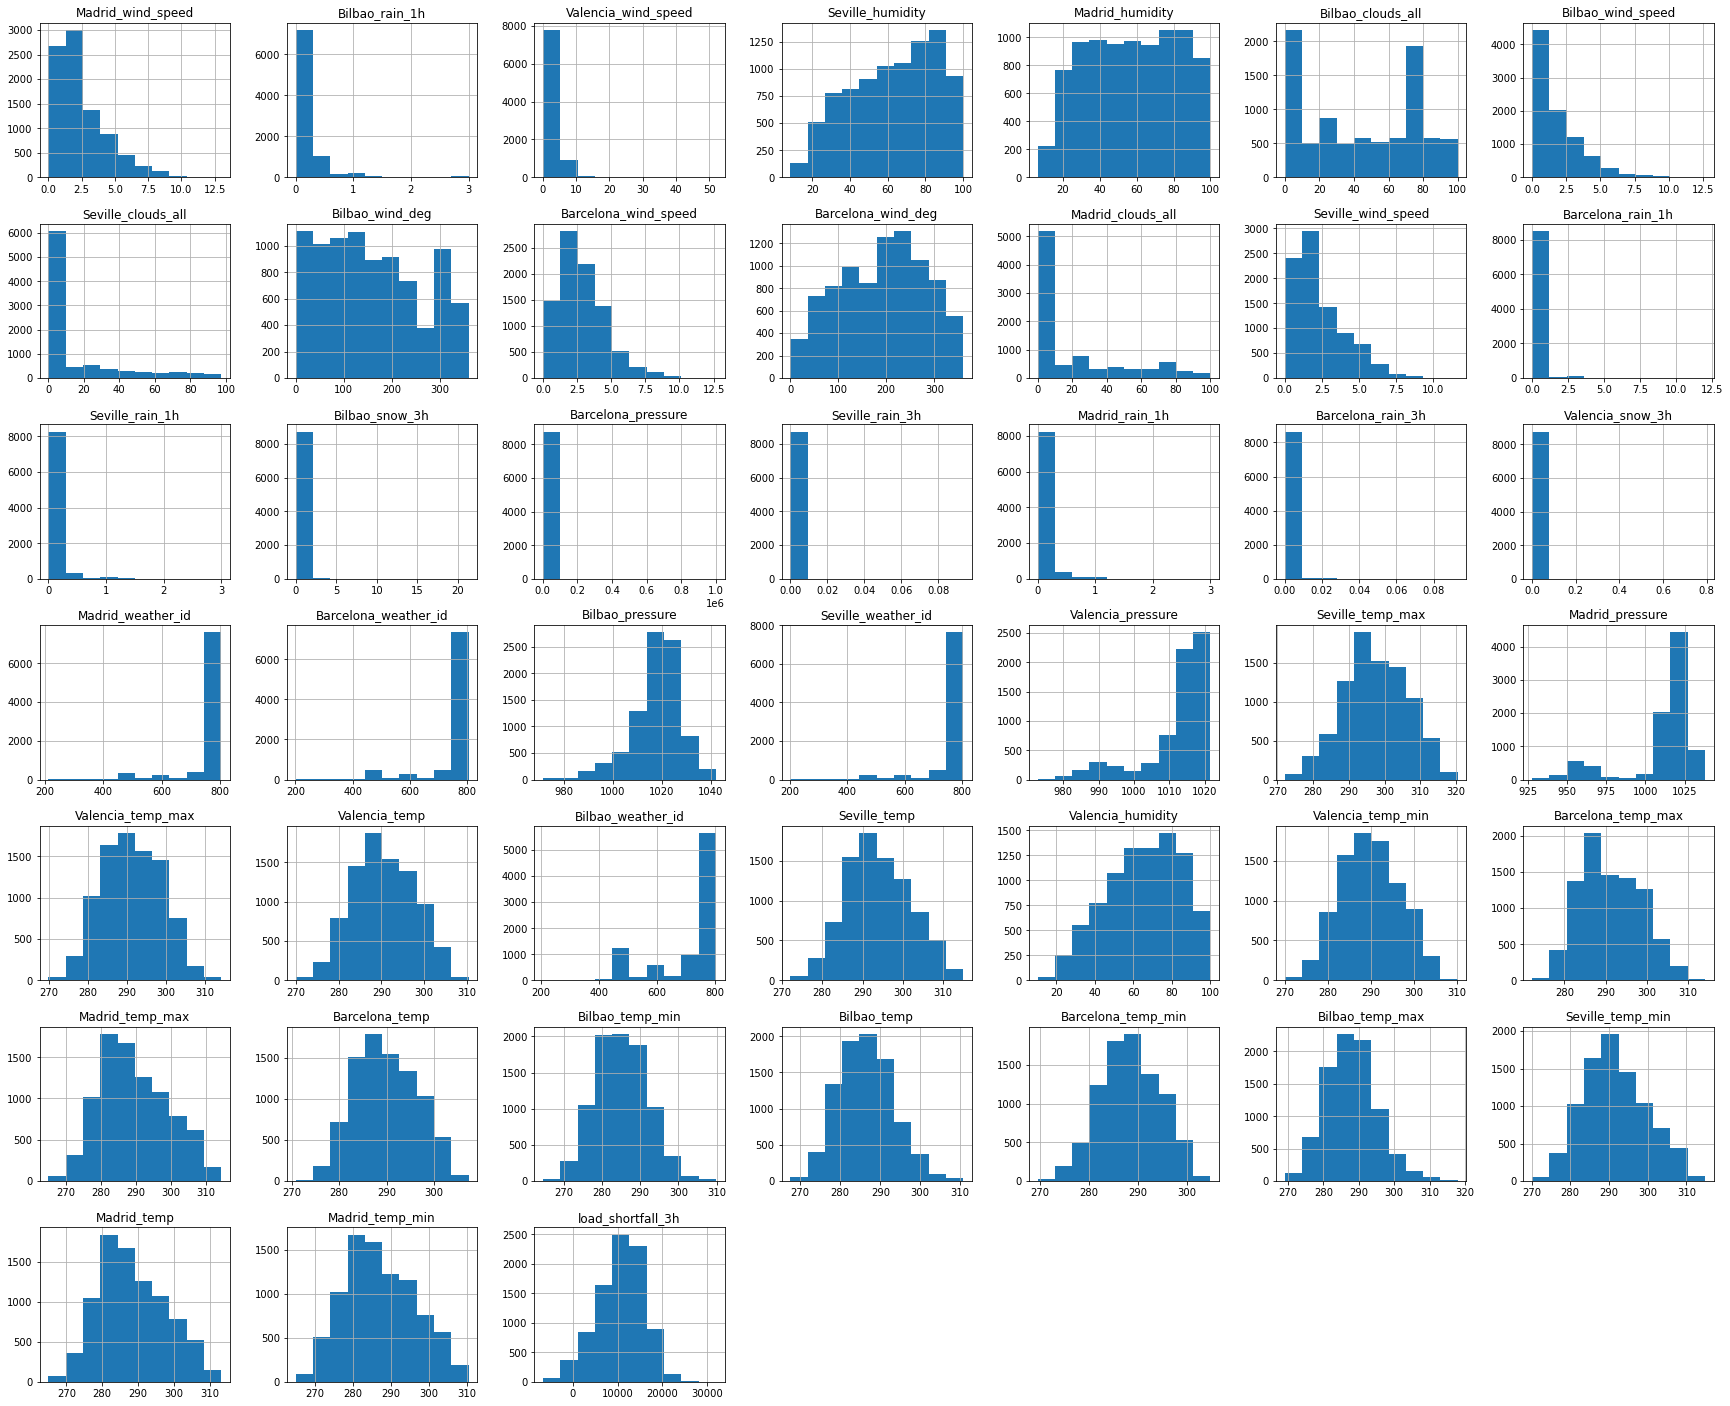

In [12]:
# plot relevant feature interactions
pd.DataFrame.hist(df_train, figsize=[30,25])
plt.show()

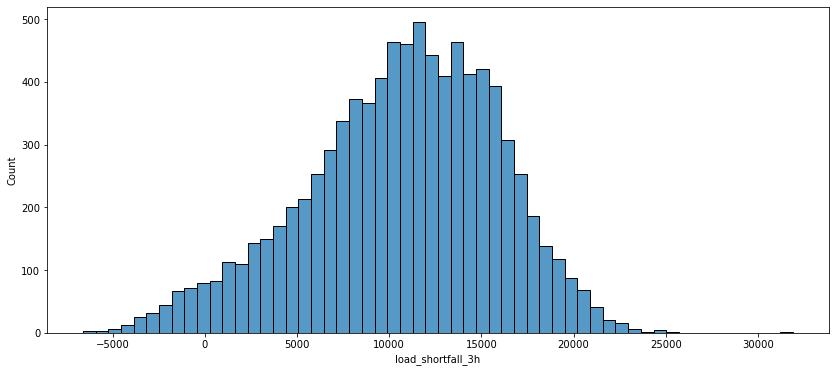

In [13]:
# Better Display of Target Variable's distribution
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(df_train['load_shortfall_3h'])
plt.show()

**Observation:** 
The histograms displayed using the Matplotlib library, Aids us in visualising all numerical features.

    - The Observed negative load shortfall values are periods when there are no shortfall i.e where there is Adequate supply of energy generated by means of various renewable source as compared to fossil fuels. 
    - We can also see the distribution of our daily shortfall in our dataset is normally distributed centered around 1250.
    - This also reveals the variation in range that exist between our features, hence the need to Scale the dataset.


**NEXT:** 

We check for Correlations & Possible collinear features 

In [14]:
# evaluating the correlation between features and the target variable
correlation = df_train.corr()
correlation['load_shortfall_3h'].sort_values(ascending=False)

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Valencia_pressure       0.086022
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rain_1h         -0.027159
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Seville_rain_3h        -0.032945
Barcelona_

**Observation**

    - Our Features seem to have less effect on our response variables. 
    
Since our dataset seems also to be a Time series (i.e a data set that tracks a sample over time.), We will have to create additional Time features from the TIME column and check for the effect of Timing on our Target Variable.
    

In [15]:
# Evaluate correlation between Variables (CHECK FOR COLLINEARLITY)

df_train.corr('pearson') 
#correlations_ 
greater_than_80_percent = df_train.corr()[np.abs(df_train.corr()) > 0.8]        # Focus on correlations > 0.8 
greater_than_80_percent  

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_rain_1h,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valencia_wind_speed,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_humidity,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_humidity,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,-0.803260,NaN,NaN,NaN,NaN,NaN,NaN,-0.802605,NaN,NaN
Bilbao_clouds_all,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_wind_speed,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_clouds_all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_wind_deg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barcelona_wind_speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**From Our correlation above and the Pearson Correlation Chat below we can deduce the Correlation Between our variables**

We are adopting the Pearson Correlation because it measures the linear relationship between features & Assumes that the features are normally distributed

<div align="left" style="width: 800px; text-align: left;">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/pearson_corr.jpg?raw=True"
     alt="Pearson Correlation"
     style="padding-bottom=0.5em"
     width=800px/>
</div>
To make more sense of our correlation numbers; Let's visualize it in our HEATMAP; the correlation between variables. This will aid in our variable selection

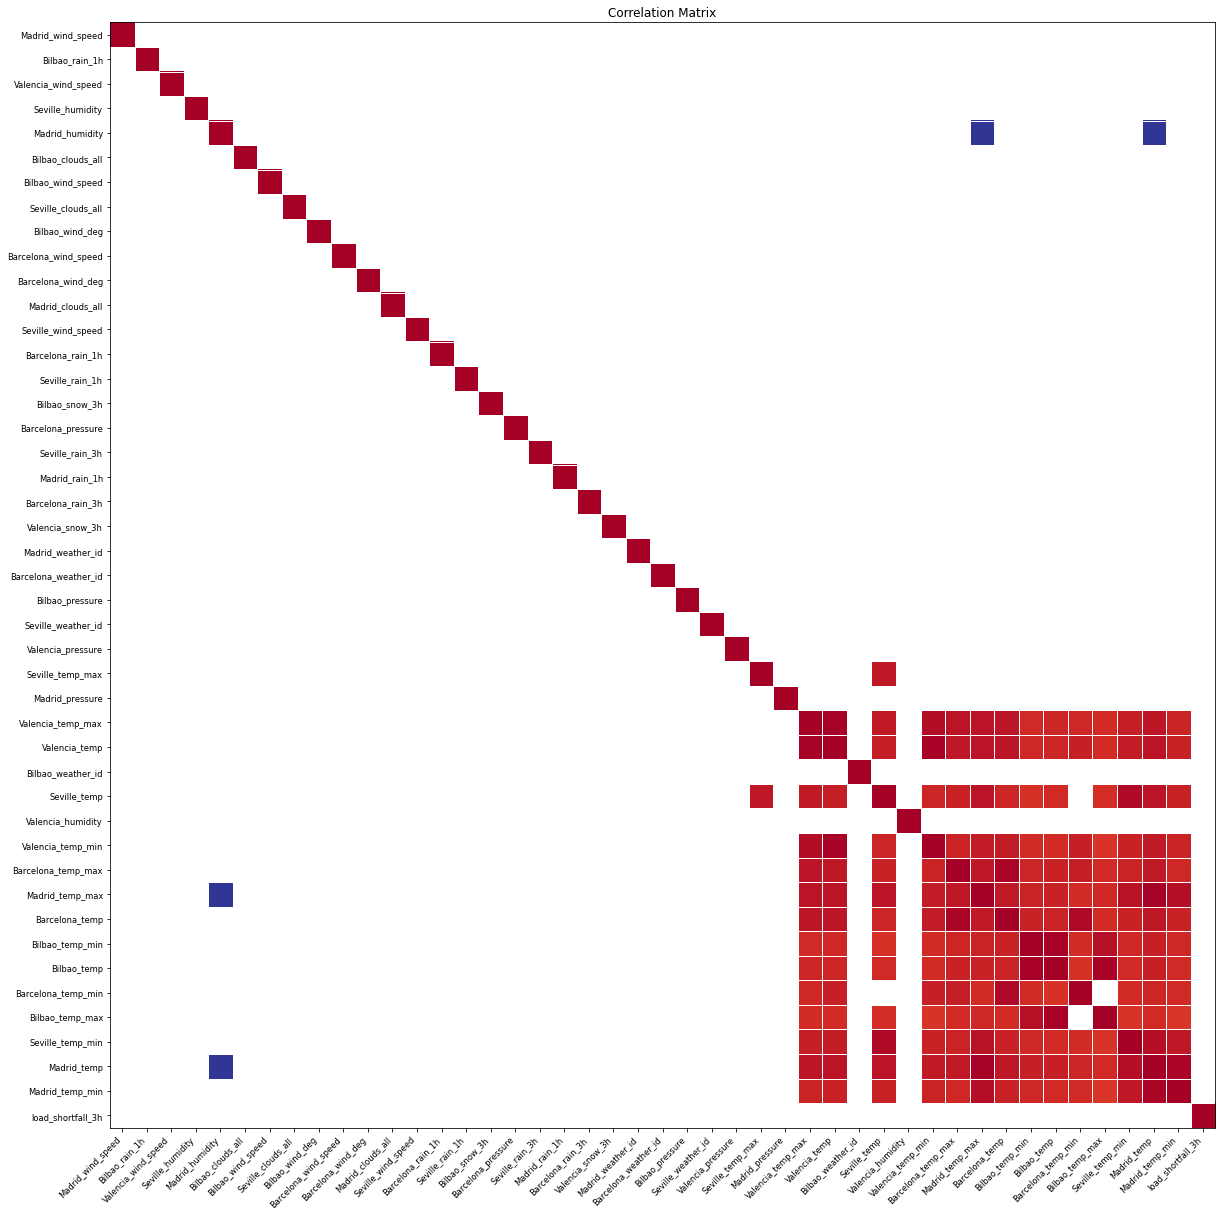

In [16]:
# Visualizing STRONG & PERFECT Correlated Variables

fig = plt.figure(figsize=(17,17));
ax = fig.add_subplot(111);
plot_corr(greater_than_80_percent, xnames = df_train.corr().columns, ax = ax);

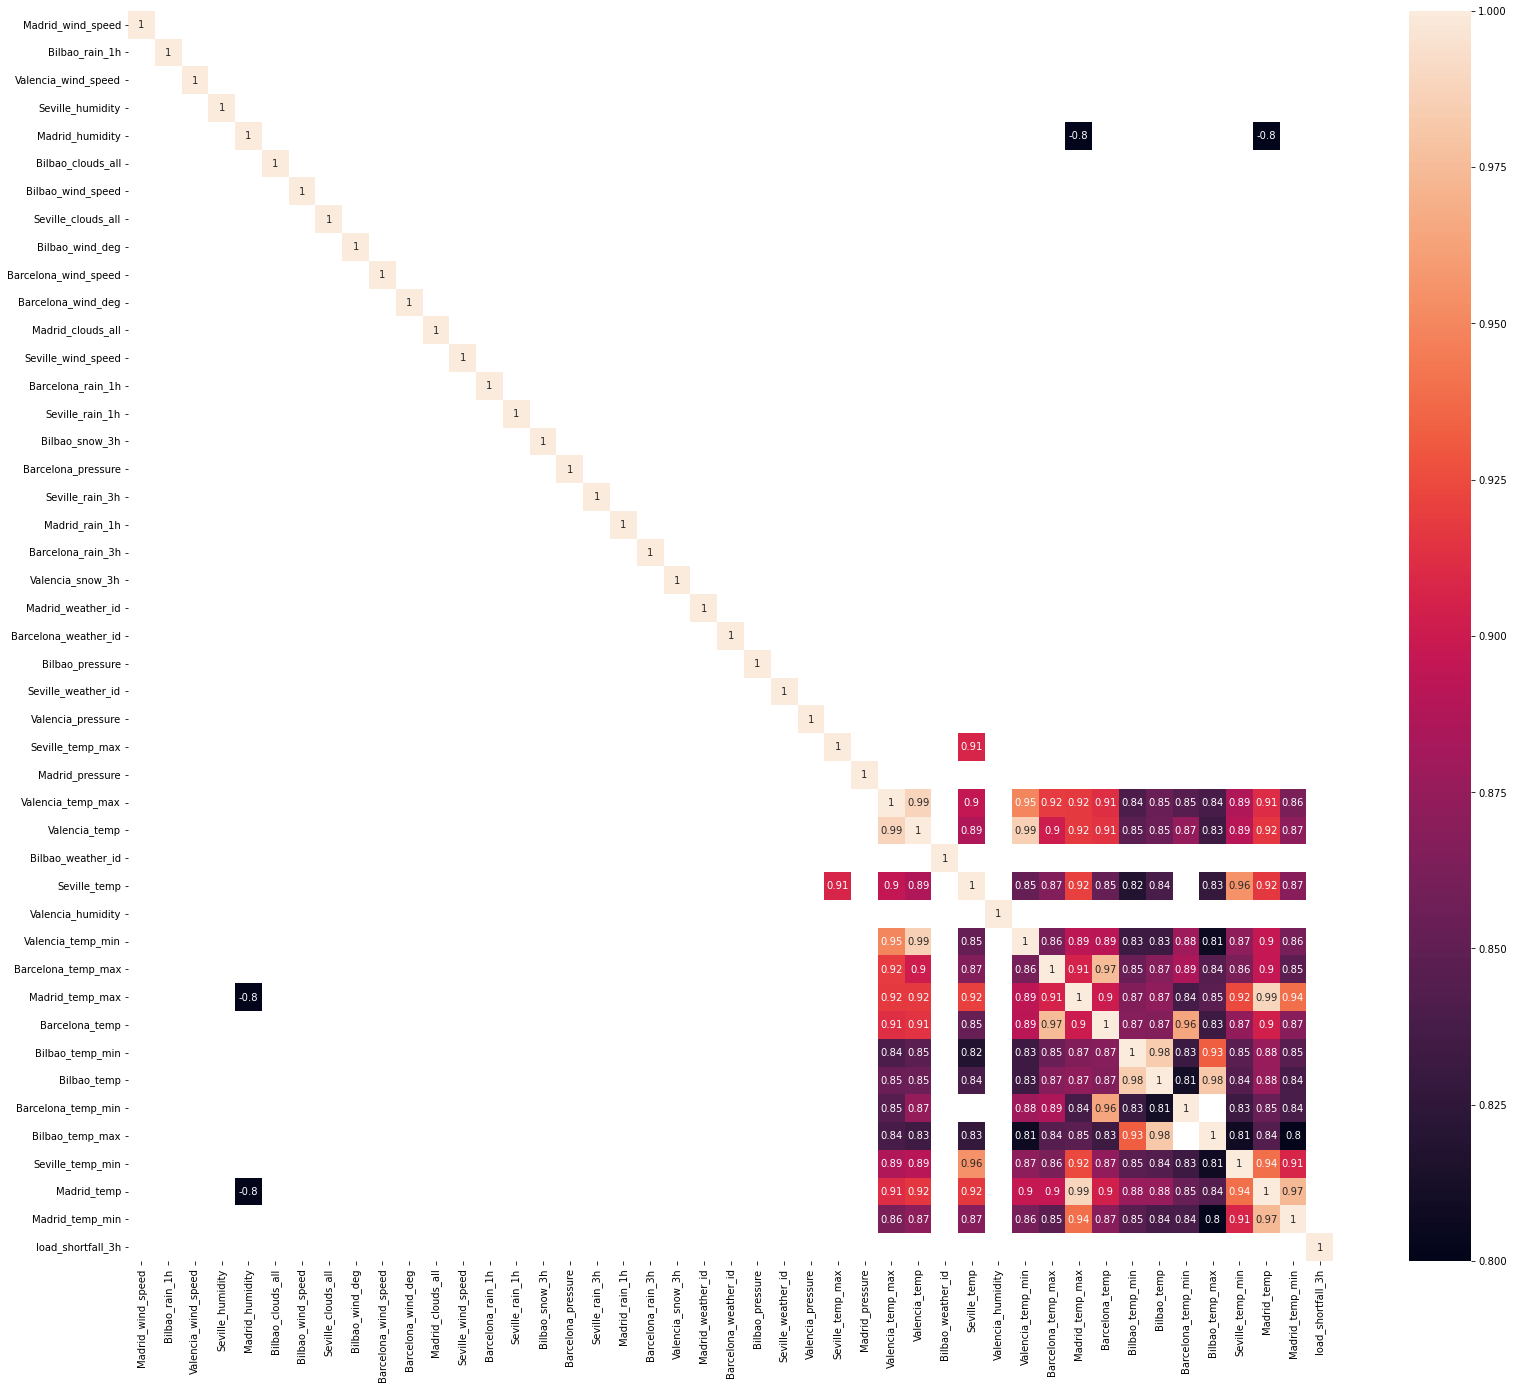

In [17]:
plt.figure(figsize=(27, 23))
heatmap = sns.heatmap(greater_than_80_percent, vmin=0.8, vmax=1, annot=True)
#plt.savefig('Weather_Shortfall_Heatmap.png')

**Obseervation:** We can deduce the following from our Heatmap;

 There is no need keeping two well correlated variables because they will be having the same effect on our response variable. If we use all of these variables, we're effectively working with superfluous or redundant information and Our model will also have collinearity issues: Below are variables with `correlations over 97%`
- `Valencia_temp_max`, `Valencia_temp_min` & `Valencia_temp` are perfectly Positively correlated (Remove Max & Min)
- `Seville_temp_max`, `Seville_temp_min` & `Seville_temp` are perfectly Positively correlated (Remove Max & Min)
- `Barcelona_temp_max`, `Barcelona_temp_min` & `Barcelona_temp` are perfectly Positively correlated (Remove Max & Min)
- `Madrid_temp_max`, `Madrid_temp_min` & `Madrid_temp` are perfectly Positively correlated (Remove Max & Min)
- `Bilbao_temp_max`, `Bilbao_temp_min` & `Bilbao_temp` are perfectly Postively correlated (Remove Max & Min)
- Negative correlation between `humidity` of `seville & madrid` against the `Temp across the cities` 

Effecting this should drop considerable redundant features from our train dataset thereby improving our Model

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [18]:
# CHECKING THE INFLUENCE OF TIME on our RESPONSE Variable

# First Convert the TIME column from object to datetime datatype
df_train['time'] = pd.to_datetime(df_train['time'])

In [19]:
# creating the temporal features 
# Later VERIFY any strong influence on our RESPONSE Variable and USE.
df_train['Day_of_Week'] = df_train['time'].dt.dayofweek
df_train['Week_of_Year'] = df_train['time'].dt.weekofyear
df_train['Day_of_Year'] = df_train['time'].dt.dayofyear
df_train['Month_of_Year'] = pd.DatetimeIndex(df_train['time']).month                          #Actual Month
df_train['Year'] = pd.DatetimeIndex(df_train['time']).year                                    #Actual Year
df_train['Day_of_Month'] = pd.DatetimeIndex(df_train['time']).day                             #Day of month
df_train['Hour_of_Day'] = pd.DatetimeIndex(df_train['time']).hour                             #Hour of day
df_train['Hour_of_Year'] = (df_train['time'].dt.dayofyear )* 24 + df_train['time'].dt.hour    #Hour of year -1
df_train['Hour_of_Week'] = (df_train['time'].dt.dayofweek ) * 24 +  df_train['time'].dt.hour  #Hour of week
#df_train = df_train.drop('time', axis=1)
df_train.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_13224/4011315775.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train['Week_of_Year'] = df_train['time'].dt.weekofyear


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,load_shortfall_3h,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,6715.666667,3,1,1,1,2015,1,3,27,75
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,4171.666667,3,1,1,1,2015,1,6,30,78
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,4274.666667,3,1,1,1,2015,1,9,33,81
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,5075.666667,3,1,1,1,2015,1,12,36,84
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,6620.666667,3,1,1,1,2015,1,15,39,87


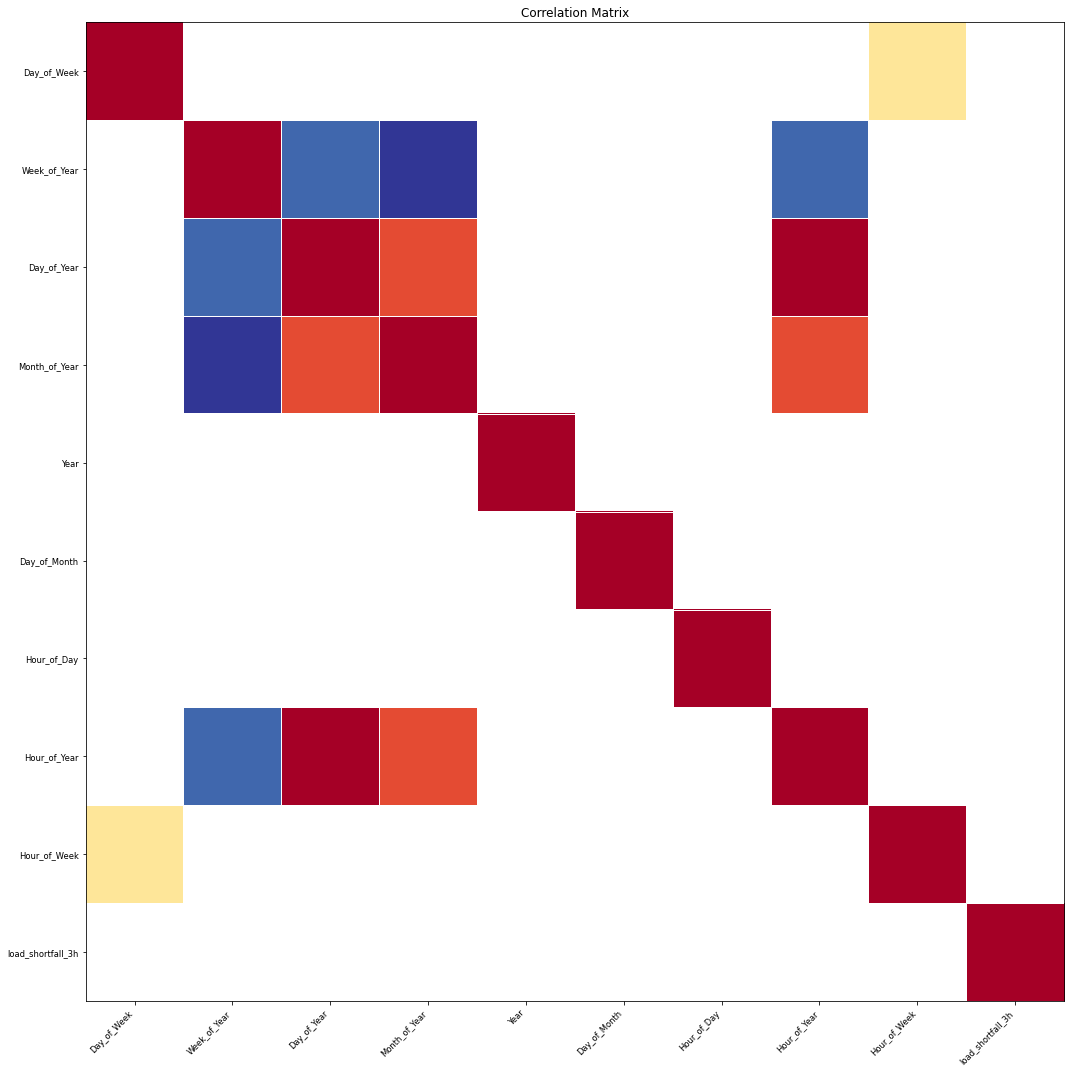

In [20]:
# Plotting our TIME vs Target var. correlation heatmap
time_df = df_train[['Day_of_Week', 'Week_of_Year', 'Day_of_Year', 'Month_of_Year', 
                    'Year', 'Day_of_Month', 'Hour_of_Day', 'Hour_of_Year', 
                    'Hour_of_Week', 'load_shortfall_3h']].copy()
correlate = time_df.corr()
#greater_than_80_percent = correlate[np.abs(correlate) > 0.8
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr( correlate[np.abs(correlate) > 0.8], xnames = correlate.columns, ax = ax);

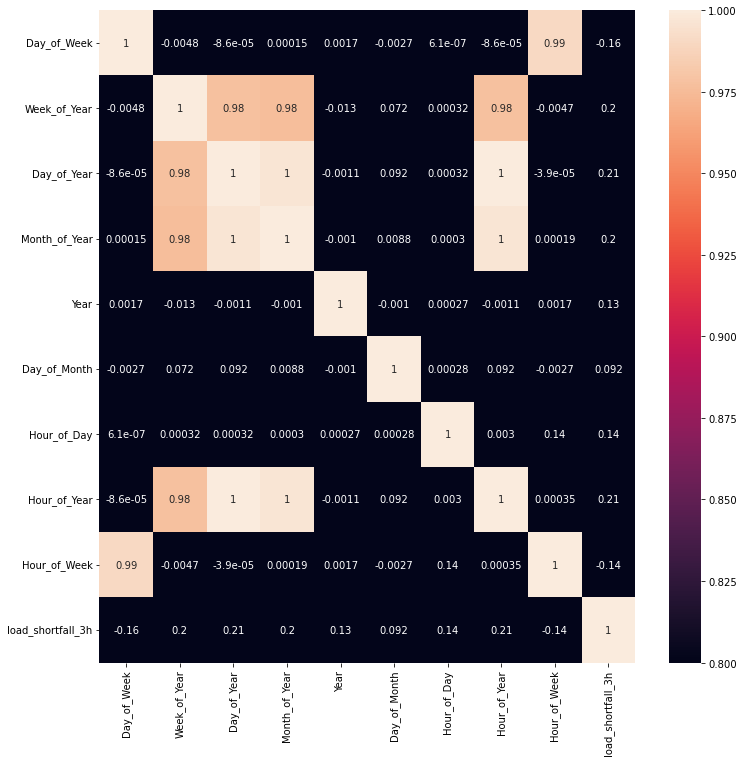

In [21]:
# Plotting Heatmap using seaborn
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(correlate, vmin=0.8, vmax=1, annot=True)
#plt.savefig('Time_Shortfall_Heatmap.png')

In [22]:
# Correlation against Target variable
cor = df_train.corr()
cor['load_shortfall_3h'].sort_values(ascending=False)

load_shortfall_3h       1.000000
Hour_of_Year            0.205906
Day_of_Year             0.205528
Valencia_temp_min       0.201863
Week_of_Year            0.201080
Month_of_Year           0.199048
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Hour_of_Day             0.139285
Year                    0.131324
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Day_of_Month            0.092116
Valencia_pressure       0.086022
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_wea

**Obseervation:** We can deduce the following from our Heatmap;

    - Our Time variables proves to have more influence than our weather variables
    
we suggest the following to Dropping due to Strong colinearity challenge;

- `Week_of_Year`
- `Month_of_Year`
- `Day_of_Week`
- `Year`
- `Hour_of_Year`

Let's first Dummy Encode our Categorical Variables

In order to ensure that we don't assume an underlying relationship between the categories, we can call `pd.get_dummies` with the argument `drop_first=True` so that we only create n-1 columns for each variable with n categories (i.e. one variable/column with five categories will be transformed into four columns of 0's and 1's). 

In [23]:
# selecting and creating the dummy variables for the categorical features
categorical_var = df_train[['Valencia_wind_deg', 'Seville_pressure']]
categorical_var_dum = pd.get_dummies(categorical_var, drop_first=True)
categorical_var_dum.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
time = df_train[['time']]

In [25]:
#copy the training data to a new dataframe
#del df
df = df_train.copy()

In [26]:
# drop the TIME column with DateTime datatype
df = df.drop(['time'], axis=1)

This is to Avoid

**TypeError:**  As FLOAT & DATETIME cannot be stored in a single array unless the dtype is `object`.

In [27]:
#drop the column with Object data type
df = df.drop(['Valencia_wind_deg', 'Seville_pressure'], axis=1)

In [28]:
# Create the response features and target variables
target = df['load_shortfall_3h']
df = df.drop('load_shortfall_3h', axis=1)
df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,265.938000,3,1,1,1,2015,1,3,27,75
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,266.386667,3,1,1,1,2015,1,6,30,78
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,272.708667,3,1,1,1,2015,1,9,33,81
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,281.895219,3,1,1,1,2015,1,12,36,84
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,280.678437,3,1,1,1,2015,1,15,39,87


Then we apply StandarScaler is used to STANDARDIZE(scale) the dataframe

In [29]:
# create scaler object
scaler = StandardScaler()

# convert the scaled predictor values into a dataframe
df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,-2.309892,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-1.090901,-1.731947,-0.157423
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,-2.261154,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.654451,-1.730761,-0.095526
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,-1.574407,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.218001,-1.729575,-0.033629
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,-0.576488,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.218449,-1.728389,0.028268
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,-0.708665,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.654899,-1.727204,0.090165


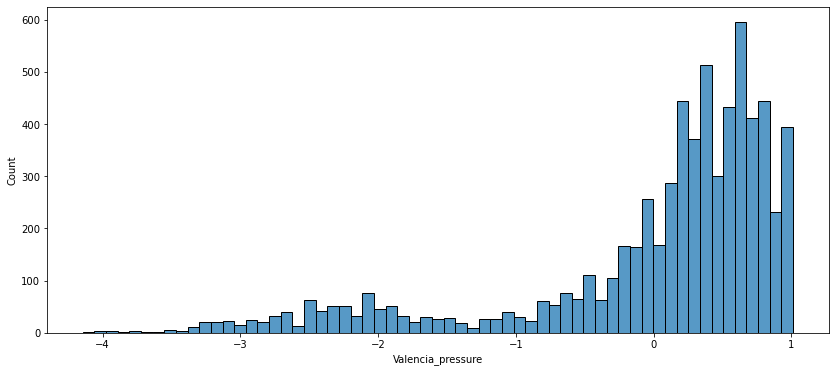

In [30]:
#histogram of the feature with the missing value (Valencia_pressure)
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(df['Valencia_pressure'], ax=ax);

Here we use the K-nearest neighbours (KNN) Algorithm to Impute the missing valuse, KNN calculates the mean of the neighbours based on the number of neighbours specified in side paramenter here we are using (6) as the number of neighbours

In [31]:
# engineer existing features
# handling missing values/ features
imputer = KNNImputer(n_neighbors=6)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [32]:
#Check
df['Valencia_pressure'].isnull().sum()

0

In [33]:
# Concatenating the df with the dummy categorical df
df = pd.concat([df, categorical_var_dum], axis=1)
df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,0,0,1,0,0,0,0,0,0,0
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,0,0,1,0,0,0,0,0,0,0
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,0,0,1,0,0,0,0,0,0,0
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,0,0,1,0,0,0,0,0,0,0
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,0,0,1,0,0,0,0,0,0,0


In [34]:
#Rearranging the columns
column_titles = [col for col in df.columns]
df = df.reindex(columns = column_titles)

In [35]:
df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,0,0,1,0,0,0,0,0,0,0
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,0,0,1,0,0,0,0,0,0,0
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,0,0,1,0,0,0,0,0,0,0
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,0,0,1,0,0,0,0,0,0,0
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,0,0,1,0,0,0,0,0,0,0


Total Columns ==> 86

Then we Begin Test Dropping

In [36]:
# Drop All temp_max and temp_min all the cities to avoid Multicollinearity
df = df.drop(['Seville_temp_max','Valencia_temp_max','Barcelona_temp_max','Madrid_temp_max','Bilbao_temp_max','Seville_temp_min','Valencia_temp_min','Barcelona_temp_min','Madrid_temp_min','Bilbao_temp_min'],axis=1)

In [37]:
# DROPPING REDUNDANT TIME VARIABLES
df = df.drop(['Week_of_Year','Month_of_Year', 'Day_of_Week', 'Year', 'Hour_of_Year'], axis=1)

Check for Correlations After dropping Redundant Features

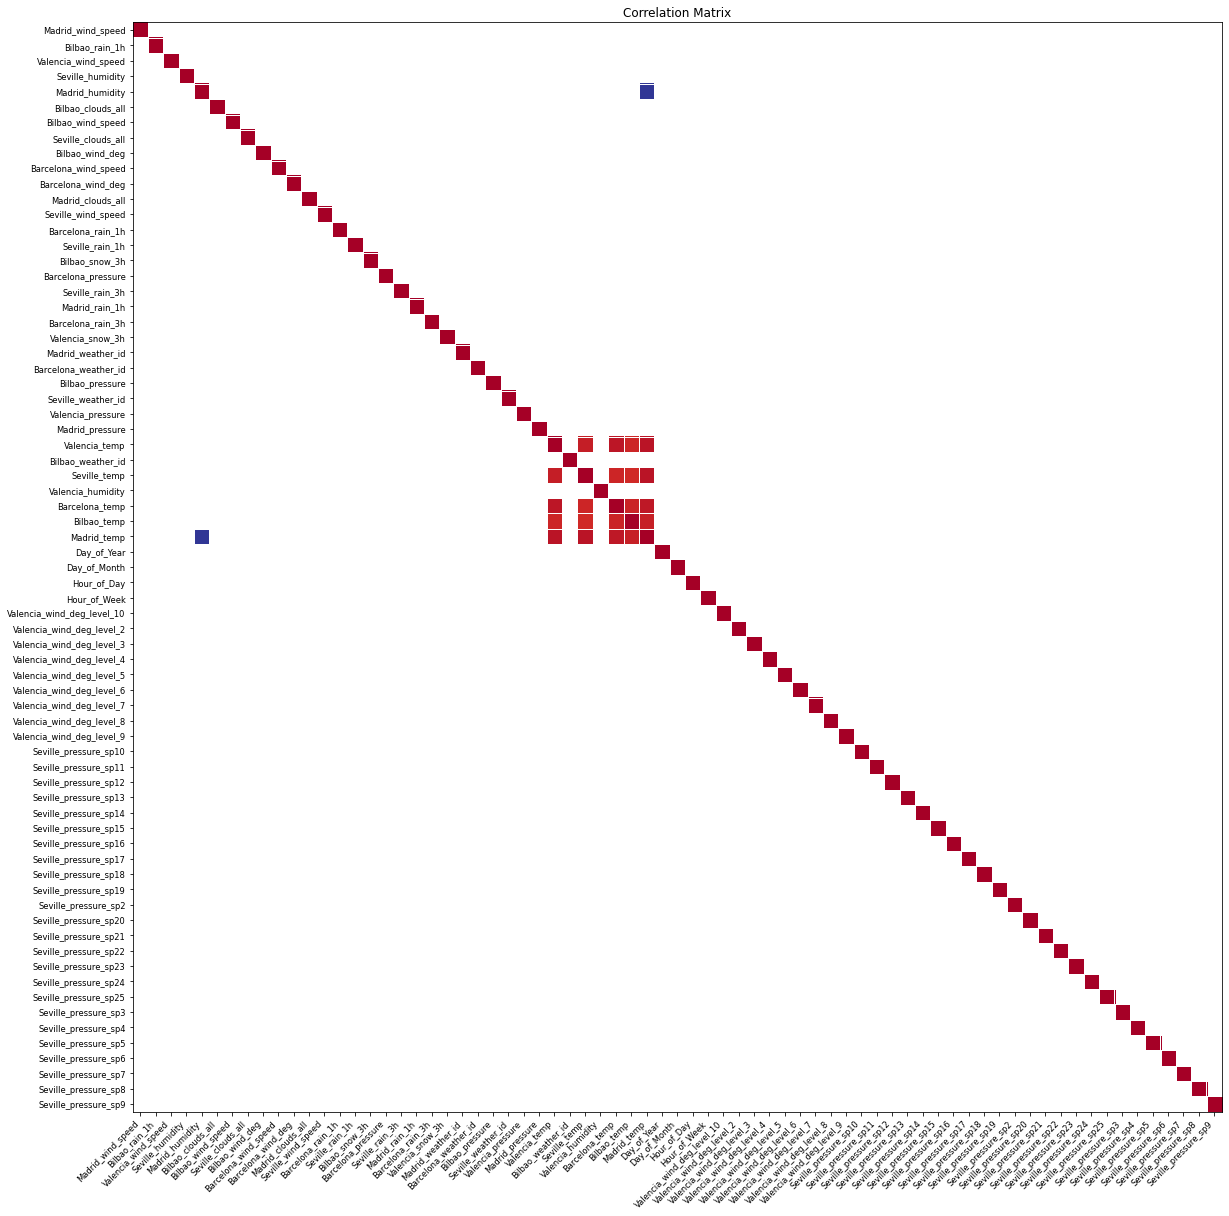

In [38]:
# Visualize Essential Columns

fig = plt.figure(figsize=(17,17));
ax = fig.add_subplot(111);
plot_corr(df.corr()[np.abs(df.corr()) > 0.8], xnames = df.corr().columns, ax = ax);

In [39]:
# Let's check our Shape
df.shape

(8763, 71)

Columns drops from `86` to `71` i.e Excluding our target variable

In [40]:
# Brief Overview
j_df = pd.concat([df, target], axis=1)
j_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Madrid_wind_speed           8763 non-null   float64
 1   Bilbao_rain_1h              8763 non-null   float64
 2   Valencia_wind_speed         8763 non-null   float64
 3   Seville_humidity            8763 non-null   float64
 4   Madrid_humidity             8763 non-null   float64
 5   Bilbao_clouds_all           8763 non-null   float64
 6   Bilbao_wind_speed           8763 non-null   float64
 7   Seville_clouds_all          8763 non-null   float64
 8   Bilbao_wind_deg             8763 non-null   float64
 9   Barcelona_wind_speed        8763 non-null   float64
 10  Barcelona_wind_deg          8763 non-null   float64
 11  Madrid_clouds_all           8763 non-null   float64
 12  Seville_wind_speed          8763 non-null   float64
 13  Barcelona_rain_1h           8763 

Data Ready for Modeling

No Missing values
Features are all in Numeric Format

### Cleaning the test dataframe and handling the missing values

In [41]:
#copy the test df to a new df
test_df = df_test.copy()

In [42]:
# Convert time to Datetime
test_df['time'] = pd.to_datetime(test_df['time'])

In [43]:
test_df['Day_of_Week'] = test_df['time'].dt.dayofweek
test_df['Week_of_Year'] = test_df['time'].dt.weekofyear
test_df['Day_of_Year'] = test_df['time'].dt.dayofyear
test_df['Month_of_Year'] = pd.DatetimeIndex(test_df['time']).month                         #Actual Month
test_df['Year'] = pd.DatetimeIndex(test_df['time']).year                                   #Actual Year
test_df['Day_of_Month'] = pd.DatetimeIndex(test_df['time']).day                            #Day of month
test_df['Hour_of_Day'] = pd.DatetimeIndex(test_df['time']).hour                            #Hour of day
test_df['Hour_of_Year'] = (test_df['time'].dt.dayofyear )* 24 + test_df['time'].dt.hour    #Hour of year -1
test_df['Hour_of_Week'] = (test_df['time'].dt.dayofweek ) * 24 +  test_df['time'].dt.hour  #Hour of week
#df_train = df_train.drop('time', axis=1)
test_df.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_13224/265599732.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test_df['Week_of_Year'] = test_df['time'].dt.weekofyear


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,279.150000,0,1,1,1,2018,1,0,24,0
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,278.150000,0,1,1,1,2018,1,3,27,3
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,276.150000,0,1,1,1,2018,1,6,30,6
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,274.483333,0,1,1,1,2018,1,9,33,9
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,280.150000,0,1,1,1,2018,1,12,36,12


In [44]:
test_time = test_df[['time']]

# Needs Reindex the test data
test_time = test_time.reset_index().drop(["index"], axis=1)
test_time

,time
0,2018-01-01 00:00:00
1,2018-01-01 03:00:00
2,2018-01-01 06:00:00
3,2018-01-01 09:00:00
4,2018-01-01 12:00:00
...,...
2915,2018-12-31 09:00:00
2916,2018-12-31 12:00:00
2917,2018-12-31 15:00:00
2918,2018-12-31 18:00:00


In [45]:
#drop the categorical columns 
test_df = test_df.drop(['time', 'Valencia_wind_deg', 'Seville_pressure' ], axis=1)

In [46]:
#sacling the dataFrame using the StandarScalar
test_df = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)

In [47]:
#Imputing the missing values using Knn Imputer
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns = test_df.columns)

In [48]:
#creating dummies for test categorical variables
cat_var = df_test[['Valencia_wind_deg', 'Seville_pressure']]
test_dummies = pd.get_dummies(cat_var, drop_first=True)
test_dummies.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
8763,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8764,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8765,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8766,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8767,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Resetting the index to start from zero not (8763), which will make an additional column called index, so the index column is being drop here: this is done to make the work of concatenation easrie with out having issues with NaN

In [49]:
#resetting the index and droping the index column
test_dummies = test_dummies.reset_index().drop(["index"], axis=1)
test_dummies.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
#concatenating the test dataframe and the test_dummies dataframe
test_df = pd.concat([test_df, test_dummies], axis=1)
test_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,1.432590,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,0.911814,...,0,0,1,0,0,0,0,0,0,0
1,1.244747,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,1.322013,...,0,0,1,0,0,0,0,0,0,0
2,-0.070152,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,0.911814,...,0,0,1,0,0,0,0,0,0,0
3,0.117691,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,-0.113683,...,0,0,1,0,0,0,0,0,0,0
4,0.869062,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,1.322013,...,0,0,1,0,0,0,0,0,0,0


In [51]:
# Drop All temp_max and temp_min all the cities to avoid Multicollinearity
test_df = test_df.drop(['Seville_temp_max','Valencia_temp_max','Barcelona_temp_max','Madrid_temp_max','Bilbao_temp_max','Seville_temp_min','Valencia_temp_min','Barcelona_temp_min','Madrid_temp_min','Bilbao_temp_min'],axis=1)


In [52]:
# DROPPING REDUNDANT TIME VARIABLES
test_df = test_df.drop(['Week_of_Year','Month_of_Year', 'Day_of_Week', 'Year', 'Hour_of_Year'], axis=1)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [53]:
# optimized for both memory efficiency and training speed.
data_dmatrix = xgb.DMatrix(data=df,label=target)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [54]:
#creating the features and target variables
X = df
y = target

In [55]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)


In [56]:
# create one or more ML models

# Create linear model
lm = LinearRegression()

# Create ridge model
ridge = Ridge()

# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01) 
# Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square

#create Xgboost
#xg_reg = xgb.XGBRegressor()

#### NB!!! 
The cell below was Changed to markdown; Reasons being, running the cell will yield the best parameters
for our model and this is to be done once. It will take hours to finish this task so DON'T RUN if you dont want 
to wait for hours to finish (3 - 4hrs)

Last Run; `Fitting 5 folds for each of 1638 candidates, totalling 8190 fits`

# Get hyper-parameters to tune
    parameters = {'objective':['reg:squarederror'], 
              'learning_rate': np.arange(0.01, 0.5, 0.04),  
              'max_depth': range(1, 10), 
              'alpha': range(1, 15), 
              'subsample': [0.7], 
              'colsample_bytree': [0.4], 
              'n_estimators': [100]}

    xgb_grid = GridSearchCV(xg_reg,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True, 
                        scoring='neg_mean_squared_error')

    xgb_grid.fit(x_train, y_train)

    print(xgb_grid.best_score_)
    print(xgb_grid.best_params_)

    RESULT FORMAT:
    Fitting 5 folds for each of 1638 candidates, totalling 8190 fits
    -16378822.78399027
    {'alpha': 6, 'colsample_bytree': 0.4, 'learning_rate': 0.09, 'max_depth': 6, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}

Fitting 5 folds for each of 1638 candidates, totalling 8190 fits
-16459005.975134214
{'alpha': 1, 'colsample_bytree': 0.4, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}

In [57]:
#create Xgboost
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.6, learning_rate = 0.1,
                max_depth = 5, alpha = 6, n_estimators = 100, subsample = 0.7) 

'''
reg:squaredlogerror objective. 
This metric reduces errors generated 
by outliers in dataset. from sklearn
'''

'\nreg:squaredlogerror objective. \nThis metric reduces errors generated \nby outliers in dataset. from sklearn\n'

In [58]:
# Fit the Ml model
lm.fit(x_train, y_train)
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
xg_reg.fit(x_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(alpha=6, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=6,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
# Extract the model intercept value
b0 = float(ridge.intercept_)
b0

10354.016072833618

In [60]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, x_train.columns, columns=['Coefficient'])
coeff

,Coefficient
Madrid_wind_speed,-360.412988
Bilbao_rain_1h,-219.693699
Valencia_wind_speed,-58.954672
Seville_humidity,-656.426529
Madrid_humidity,-234.221667
...,...
Seville_pressure_sp5,-387.168117
Seville_pressure_sp6,-394.250377
Seville_pressure_sp7,-1457.315568
Seville_pressure_sp8,-612.882948


In [61]:
# evaluate one or more ML models
train_ridge = ridge.predict(x_train)
train_lm = lm.predict(x_train)
train_lasso = lasso.predict(x_train)
xgboost = xg_reg.predict(x_train)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [62]:
# Make TEST set predictions for each model
test_lm = lm.predict(x_test)
test_ridge = ridge.predict(x_test)
test_lasso = lasso.predict(x_test)
test_xgboost = xg_reg.predict(x_test)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [63]:
# Compare model performance
results_dict = {'Training RMSE':
                    {
                        'linear Model': np.sqrt(metrics.mean_squared_error(y_train, train_lm)),
                        'Ridge': np.sqrt(metrics.mean_squared_error(y_train, train_ridge)),
                        'LASSO': np.sqrt(metrics.mean_squared_error(y_train, train_lasso)),
                        'Xgboost Model': np.sqrt(metrics.mean_squared_error(y_train, xgboost))
                    },  
                    'Training MSE':
                    {
                        'linear Model': metrics.mean_squared_error(y_train, train_lm),
                        'Ridge': metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso),
                        'Xgboost Model': metrics.mean_squared_error(y_train, xgboost)
                    },                     
                    'Test MSE':
                    {
                        'linear Model': metrics.mean_squared_error(y_test, test_lm),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso),
                        "Xgboost Model": metrics.mean_squared_error(y_test, test_xgboost)
                    },
                 
                 }

results_dict

{'Training RMSE': {'linear Model': 4748.027270301868,
  'Ridge': 4748.028791228698,
  'LASSO': 4748.0272925926,
  'Xgboost Model': 2230.492720519778},
 'Training MSE': {'linear Model': 22543762.95953021,
  'Ridge': 22543777.402336646,
  'LASSO': 22543763.171204217,
  'Xgboost Model': 4975097.77629172},
 'Test MSE': {'linear Model': 23085374.824023187,
  'Ridge': 23079634.688439336,
  'LASSO': 23084908.54084431,
  'Xgboost Model': 13916692.480258988}}

In [66]:
Training_MSE = {
                        'linear Model': metrics.mean_squared_error(y_train, train_lm),
                        'Ridge': metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso),
                        'Xgboost Model': metrics.mean_squared_error(y_train, xgboost)
                    }

In [86]:
values = list(Training_MSE.values())
ind = np.arange(len(values)) 
ind

array([0, 1, 2, 3])

NameError: name 'train' is not defined

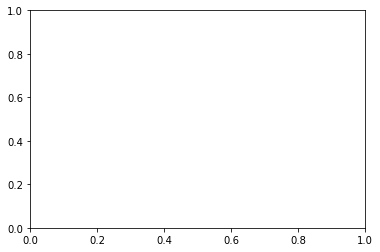

In [87]:
# PLOT Bar chart

models = list(Training_MSE.keys())
values = list(Training_MSE.values())

fig, ax = plt.subplots()
width = 0.75
ind = np.arange(len(values))
ax.barh(ind - 0.2, train, width)

#Create plot
for i, v in enumerate(values):
    ax.text(v + 3, i + .25, str(v),fontweight='bold')

plt.xlabel("Regression Model")
plt.ylabel("RMSE (Root Mean Square Error)")
plt.title("RMSE per Model")

plt.show()

In [ ]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df.T

OBSERVATION:
    
    Our Best Model is the XgBoost;  
    
    - it's RMSE(the square root of the mean of the square of all of the error) is far lesser than the other models.
    - it's MSE(Mean Squared Error) for TEST Data(Unseen/Real_world Data) performed far better than in the TRAINING, which shows the predictive power of our model.

    14172827.27617919
    14211179.009013383

NEXT: We proceed to Exporting our Prediction & Model

In [ ]:
#test_df = test_df.drop('load_shortfall_3h', axis=1)

In [ ]:
new_prediction = xg_reg.predict(test_df)

In [ ]:
# Choose best model and motivate why it is the best choice
predictions = ridge.predict(test_df)
predictions

In [ ]:
#test_df = test_df.drop('load_shortfall_3h', axis=1)
new_prediction

In [ ]:
test_df['load_shortfall_3h'] = new_prediction

In [ ]:
data = test_time
data

In [ ]:
new_prediction

In [ ]:
data = pd.concat([data, test_df[['load_shortfall_3h']]], axis=1)

In [ ]:
#del data

In [ ]:
# To Export prediction to csv

#data.to_csv('predictions_sub_27.csv', header=True, index=False)

In [ ]:
import pickle

model_save_path = "TM9_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(xg_reg, file)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

MSE(Mean Squared Error) of our XgBoost; which tells us how close a regression line or prediction is to a set of points revealing how good our model is.

However; it's worthy of note to reveal that there is nothing as a perfect model since it's not totally possible to take into account all the influencing features that affects our target variable. Therefore; with the few features in our scope, Our Model has done excellently well in predicting our deserved outcome.

Let's visulize the goodness of fit of each of our models


In [ ]:
# We want to plot the a continuous line for both our Actual Target var. & Model Predictions

lm_y_pred = lm.predict(x_test)
r_y_pred = ridge.predict(x_test)
la_y_pred = lasso.predict(x_test)
xg_y_pred = xg_reg.predict(x_test)

z = range(0, len(y_test))

In [ ]:
# For Linear
plt.figure(figsize=(15, 3))
plt.plot(z, y_test, label='Actual Shortfall')
plt.plot(z, lm_y_pred, label='Linear Reg. Shortfall Prediction')
plt.xlabel("Daily Observation")
plt.ylabel("3hr load Shortfall")
plt.title("Linear Regression vs Actual Test Short Fall")
plt.legend()

plt.show()

In [ ]:
# For Ridge
plt.figure(figsize=(15, 3))
plt.plot(z, y_test, label='Actual Shortfall')
plt.plot(z, r_y_pred, label='Ridge Reg. Shortfall Prediction')
plt.xlabel("Daily Observation")
plt.ylabel("3hr load Shortfall")
plt.title("Ridge Regression vs Actual Test Short Fall")
plt.legend()

plt.show()

In [ ]:
# For Lasso
plt.figure(figsize=(15, 3))
plt.plot(z, y_test, label='Actual Shortfall')
plt.plot(z, la_y_pred, label='Lasso Reg. Shortfall Prediction')
plt.xlabel("Daily Observation")
plt.ylabel("3hr load Shortfall")
plt.title("Lasso Regression vs Actual Test Short Fall")
plt.legend()

plt.show()

In [ ]:
# For our BEST Model; XgBoost
plt.figure(figsize=(15, 3))
plt.plot(z, y_test, label='Actual Shortfall')
plt.plot(z, xg_y_pred, label='XgBoost Reg. Shortfall Prediction')
plt.xlabel("Daily Observation")
plt.ylabel("3hr load Shortfall")
plt.title("XgBoost Regression vs Actual Test Short Fall")
plt.legend()

plt.show()


By Comparing all 4 graphs; You can see The closeness of fit of our model's(xgBoost) prediction (in Orange) to the Actual result. 

The outstandings can be attributed to alot of factors such as eventualities and what not.
